<a href="https://colab.research.google.com/github/varun6579/AIML-1278/blob/main/AIMLab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:

import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:

df = pd.read_csv('/content/turkishCF.csv', sep=';')


print(df.head())


   id platform_adi kitle_fonlamasi_turu kategori      fon_sekli  \
0   1      fongogo                 ödül    diğer  ya hep ya hiç   
1   2      fongogo                 ödül    diğer  ya hep ya hiç   
2   3      fongogo                 ödül    diğer  ya hep ya hiç   
3   4      fongogo                 ödül    diğer  ya hep ya hiç   
4   5      fongogo                 ödül    diğer  ya hep ya hiç   

                                           proje_adi           proje_sahibi  \
0                           Gerçek Gizlidir Filmleri              Lob Ekibi   
1                            Fongogo - Hayat Bulsun!           Fongogo Team   
2  PAYLAŞIMIN, SEVGİNİN VE ÇOCUKLARIN İYİLİK EVİ ...              SİNEM CAN   
3                         Türk Kadının 100.yıl Seyri  Deniz Tutkusu Seyirde   
4                                     Doğadaki Çocuk          Seren Kutadgu   

  proje_sahibi_cinsiyet  kac_proje_destekledi  kac_projeye_abone  ...  \
0              belirsiz                     1    

In [25]:
import pandas as pd

#quetion 1
df['toplanan_tutar'] = pd.to_numeric(df['toplanan_tutar'], errors='coerce')
df['destek_orani'] = df['destek_orani'].str.replace('%', '').astype(float)

successful_projects = df[df['basari_durumu'] == 'başarılı']


top_10_startups = successful_projects.nlargest(10, 'toplanan_tutar')

print(top_10_startups[['proje_adi', 'proje_sahibi', 'toplanan_tutar', 'destek_orani']])


                                             proje_adi           proje_sahibi  \
1259               Virüslerle Mücadelede Son Teknoloji          Berkin Enerji   
1586              Wollox Pro - Ekranlarını Özgürleştir  Alaattin Tamer Cengiz   
1572                  Ape Drone Teknolojileri Sunar: X          Çağkan Güneri   
1076                                            Blok-Z         Erhan Yıldırım   
1566                     Outliers | Akıllı Not Defteri        Eray Altunbozar   
1568             MAKEY 2.0 | Modüler Elektronik Yapboz            Şahin İncik   
662   KUMBARACI50 KAPANMASIN / HİÇBİR SAHNE KAPANMASIN           Gülhan Kadim   
1579                   Drivee SafeCall: Hayat kurtarır       Nihat Emir Çavuş   
1588            Wollox - İnteraktif  Ekran Dönüştürücü  Alaattin Tamer Cengiz   
95                        Kazdağları Dayanışma Çağrısı     Her Yer Kazdağları   

      toplanan_tutar  destek_orani  
1259         2666800       11300.0  
1586         1647420         823.0

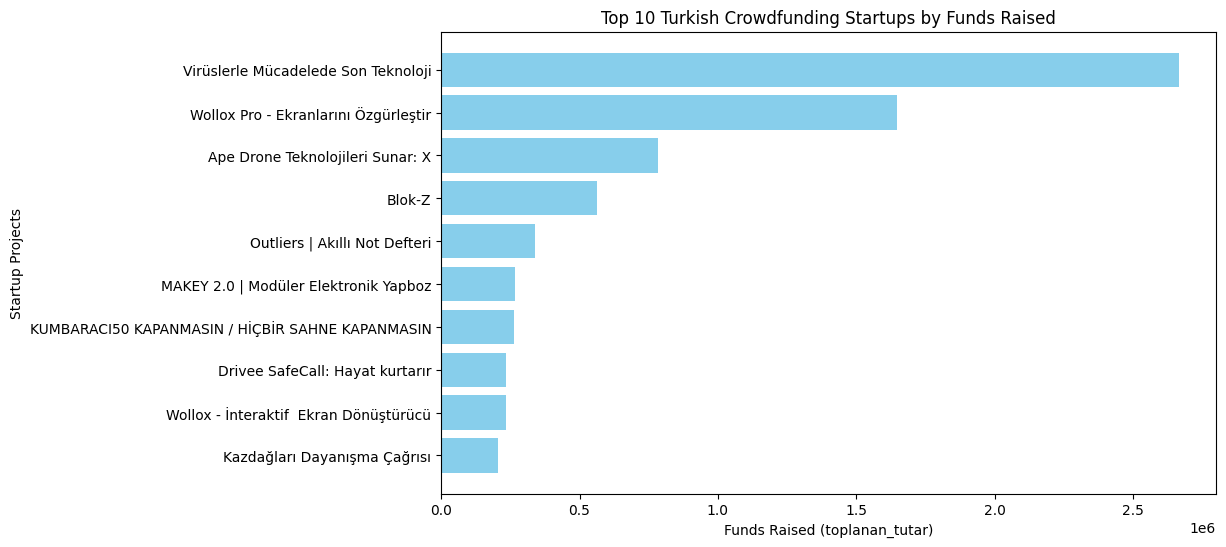

In [26]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.barh(top_10_startups['proje_adi'], top_10_startups['toplanan_tutar'], color='skyblue')
plt.xlabel("Funds Raised (toplanan_tutar)")
plt.ylabel("Startup Projects")
plt.title("Top 10 Turkish Crowdfunding Startups by Funds Raised")
plt.gca().invert_yaxis()
plt.show()


In [27]:
# Maximum and minimum crowdsourced funding obtained by Turkish startups quetion 2
max_funding = df['toplanan_tutar'].max()
min_funding = df['toplanan_tutar'].min()

print(f"Maximum Crowdsourced Funding: {max_funding}")
print(f"Minimum Crowdsourced Funding: {min_funding}")


Maximum Crowdsourced Funding: 2666800
Minimum Crowdsourced Funding: 0


In [28]:
# Quetion 3: Name the Gender Which Has Acquired the Most Funding for Startups
gender_funding = df.groupby('proje_sahibi_cinsiyet')['toplanan_tutar'].sum()
most_funding_gender = gender_funding.idxmax()

print(f"Gender with the Most Funding: {most_funding_gender}")
print(gender_funding)


Gender with the Most Funding: erkek
proje_sahibi_cinsiyet
belirsiz     3796205
erkek       11679279
kadın        3130671
Name: toplanan_tutar, dtype: int64


In [29]:

print(df.columns)

city_column = None
for col in df.columns:
    if 'sehir' in col or 'il' in col or 'location' in col or 'lokasyon' in col:  # Check for potential city-related keywords
        city_column = col
        break

if city_column:
    top_5_cities = df[city_column].value_counts().head(5)
    print("Top 5 Cities with Most Startups:\n", top_5_cities)
else:
    print("City column not found in the DataFrame. Please check the column names.")

Index(['id', 'platform_adi', 'kitle_fonlamasi_turu', 'kategori', 'fon_sekli',
       'proje_adi', 'proje_sahibi', 'proje_sahibi_cinsiyet',
       'kac_proje_destekledi', 'kac_projeye_abone', 'kac_projenin_sahibi',
       'kac_proje_takiminda', 'konum', 'bolge', 'yil', 'proje_baslama_tarihi',
       'proje_bitis_tarihi', 'gun_sayisi', 'tanitim_videosu', 'video_uzunlugu',
       'gorsel_sayisi', 'sss', 'guncellemeler', 'yorumlar', 'destekci_sayisi',
       'odul_sayisi', 'ekip_kisi_sayisi', 'web_sitesi', 'sosyal_medya',
       'sm_sayisi', 'sm_takipci', 'etiket_sayisi', 'icerik_kelime_sayisi',
       'proje_aciklamasi', 'hedef_miktari', 'toplanan_tutar', 'destek_orani',
       'basari_durumu'],
      dtype='object')
Top 5 Cities with Most Startups:
 yil
2019    433
2020    433
2018    269
2015    142
2017    108
Name: count, dtype: int64


In [30]:
# Top 5 most popular categories in Turkish startups quetion 5
top_5_technologies = df['kategori'].value_counts().head(5)

print("Top-5 Technologies Popular in Turkish Startups:")
print(top_5_technologies)


Top-5 Technologies Popular in Turkish Startups:
kategori
film-video-fotoğraf    389
teknoloji              343
kültür-sanat           194
eğitim                 186
diğer                  155
Name: count, dtype: int64


In [31]:
#quetion 6

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

features = df[['toplanan_tutar', 'destek_orani']]
target = df['basari_durumu'].apply(lambda x: 1 if x == 'başarılı' else 0)  # Encoding target

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.9969325153374233
Precision: 0.9880952380952381
Recall: 1.0
F1 Score: 0.9940119760479041
